importações

In [19]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

leitura do csv

In [20]:
df = pd.read_csv('./bi/dataframe_cotacao.tsv', sep='\t')

variaveis de leitura do tsv

In [21]:
# variavel para guardar a liquidez
liquidez_valor = df['Liquidez_Diária']
# variavel para guardar os valores das cotas
valor_cota = df['Preco_Atual']

In [22]:
rotulo = df['Setor']

preparando o as listas dos graficos

In [23]:
lista_lq = [] #liquidez_diaria
lista_vc = [] #preço atual
for lq, vc in zip(liquidez_valor,valor_cota):
    try:
        lista_lq.append(lq)
        lista_vc.append(vc)
    except:
        pass

grafico de dispersão

altura referece a liquidez diaria, x referece ao valor da cota

In [24]:
grafico_s_rt = px.scatter(y=lista_lq, x=lista_vc)
grafico_s_rt.show()

In [25]:
lista_lq = [] #liquidez_diaria
lista_vc = [] #preço atual
lista_rt = [] #rotulo
for lq, vc, rt in zip(liquidez_valor,valor_cota, rotulo):
    try:
        lista_lq.append(lq)
        lista_vc.append(vc)
        lista_rt.append(rt)
    except:
        pass

In [26]:
grafico_c_rt = px.scatter(y=lista_lq, x=lista_vc, color=lista_rt)
grafico_c_rt.show()

Transformando em matriz

In [27]:
lista_cotacao = []
for x,y in zip(lista_lq, lista_vc):
    item = [x,y]
    lista_cotacao.append(item)

print(lista_cotacao)

[[2454, 2.38], [44041, 14.7], [2702, 6.29], [29, 842.0], [67, 9.4], [3, 93.0], [200, 165.0], [11, 84.96], [5, 351.0], [3597, 115.5], [1354, 4.49], [33, 33.85], [5, 112.0], [41, 784.0], [34, 62.01], [0, 0.0], [2823, 0.96], [98, 3.71], [22, 35.06], [408, 42.42], [5495, 910.0], [24, 1000.0], [2130, 1.04], [1539, 81.89], [61, 94.0], [49, 240.99], [7, 86.48], [206, 12.78], [300, 1520.0], [47, 7.1], [218, 70.25], [13485, 4.09], [1366, 79.6], [0, 0.0], [5157, 28.45], [0, 0.0], [148, 62.5], [109581, 8.06], [52, 98.84], [21378, 89.8], [9, 195.0], [23, 87.92], [0, 0.0], [2128, 97.0], [69685, 93.84], [35771, 97.12], [32195, 153.18], [3677, 13.99], [6629, 92.51], [567, 98.88], [15393, 99.13], [32541, 124.49], [61169, 9.4], [8879, 85.0], [107752, 7.73], [92795, 87.75], [709, 71.97], [480, 80.94], [365, 65.82], [3651, 101.87], [8659, 69.2], [919, 78.55], [36579, 103.7], [79, 109.5], [0, 0.0], [4545, 43.01], [18687, 80.0], [211, 87.58], [5147, 85.1], [1409, 75.44], [0, 0.0], [22, 72.51], [2811, 54.73

In [28]:
base_cotacoes = np.array(lista_cotacao)

treino

In [29]:
scaler_base = StandardScaler()
base_cotacoes = scaler_base.fit_transform(base_cotacoes)
base_cotacoes

array([[-2.60779409e-01, -1.00325551e-01],
       [ 4.18408546e-01, -9.77160979e-02],
       [-2.56729138e-01, -9.94973885e-02],
       [-3.00383871e-01,  7.75112180e-02],
       [-2.99763265e-01, -9.88386711e-02],
       [-3.00808496e-01, -8.11316680e-02],
       [-2.97591144e-01, -6.58816176e-02],
       [-3.00677843e-01, -8.28345903e-02],
       [-3.00775833e-01, -2.64856539e-02],
       [-2.42112233e-01, -7.63660273e-02],
       [-2.78744320e-01, -9.98786398e-02],
       [-3.00318544e-01, -9.36600081e-02],
       [-3.00775833e-01, -7.71073492e-02],
       [-3.00187890e-01,  6.52264552e-02],
       [-3.00302213e-01, -8.76955439e-02],
       [-3.00857492e-01, -1.00829650e-01],
       [-2.54752998e-01, -1.00626316e-01],
       [-2.99256981e-01, -1.00043849e-01],
       [-3.00498193e-01, -9.34037225e-02],
       [-2.94194143e-01, -9.18448285e-02],
       [-2.11114596e-01,  9.19140435e-02],
       [-3.00465530e-01,  1.10976607e-01],
       [-2.66070891e-01, -1.00609371e-01],
       [-2.

cluster

separando o numero de segmentos

In [30]:
n_cluster = df['Setor']
n_cluster = set(n_cluster)
n_cluster = len(n_cluster)
n_cluster

9

In [31]:
k_means_cotacao = KMeans(n_clusters=n_cluster)
k_means_cotacao.fit(base_cotacoes)

KMeans(n_clusters=9)

localizando os pontos de referencia

In [32]:
centroides = k_means_cotacao.cluster_centers_
centroides

array([[-0.27097913, -0.07026183],
       [-0.30084116, 15.99644584],
       [13.57218566, -0.09866075],
       [ 5.15400806, -0.0986957 ],
       [ 1.5208498 , -0.09492355],
       [-0.30084116,  4.9823087 ],
       [ 0.25142621, -0.08093555],
       [-0.0353977 , -0.08187602],
       [ 0.69880114, -0.08692412]])

vizualizando centros em 2D matematicamente pelo reverse scaler

In [33]:
# scaler_base.inverse_transform(k_means_cotacao.cluster_centers_)

add rotulos

In [34]:
rotulos = k_means_cotacao.labels_
rotulos

array([0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 4, 0, 7, 0, 0, 0, 0,
       8, 6, 6, 0, 0, 0, 7, 6, 8, 0, 4, 4, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0,
       7, 0, 0, 0, 0, 0, 0, 4, 0, 0, 7, 0, 6, 0, 0, 0, 0, 0, 7, 0, 0, 0,
       4, 6, 0, 0, 6, 4, 0, 0, 0, 7, 6, 0, 0, 0, 8, 0, 6, 0, 0, 0, 7, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 6, 0, 0, 8, 0, 0, 6, 6, 6, 2, 0,
       7, 0, 7, 6, 7, 0, 0, 7, 6, 0, 0, 6, 0, 7, 7, 0, 0, 7, 7, 0, 0, 7,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 3, 4, 7, 0, 8, 7, 7, 0, 8, 0, 7,
       0, 0, 0, 0, 0, 7, 0, 0, 5, 0, 0, 0, 0, 0, 6, 0, 7, 0, 0, 0, 0, 7,
       4, 0, 0, 6, 0, 0, 8, 8, 0, 6, 0, 6, 7, 0, 7, 0, 8, 0, 0, 0, 0, 0,
       0, 6, 0, 7, 8, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 7, 0, 8, 6, 0,
       3, 8, 6, 4, 6, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 0, 0,
       0, 0, 7, 0, 8, 0, 7, 0, 0, 0, 1, 6, 0, 7, 0, 0, 0, 0, 0])

grafico do cluster

In [35]:
grafico_cluster = px.scatter(y=base_cotacoes[:,0], x=base_cotacoes[:,1], color=rotulos)
grafico_centroid = px.scatter(y=centroides[:,0], x=centroides[:,1], size=[1,2,3,4,5,6,7,8,9])
grafico_geral = go.Figure(data=grafico_cluster.data + grafico_centroid.data)
grafico_geral.show()

In [36]:
n_cluster = df['Setor']
n_cluster = set(n_cluster)
nome_cluster = n_cluster
for id, x in enumerate(nome_cluster):
    id_n = id+1
    print(id_n,x)

1 Hotel
2 Logística
3 Lajes Corporativas
4 Hospital
5 Outros
6 Shoppings
7 Residencial
8 Títulos e Val. Mob.
9 Híbrido


o Y referece ao numero de ações em circulação
o X referece ao valor da ação

logo quanto mais a direita mais cara é a ação e quanto mais alta mais fácil a liquidez da ação.

In [37]:
nome_rotulo = df['Codigo_do_fundo']

In [38]:
grafico_c_rt = px.scatter(y=lista_lq, x=lista_vc, color=lista_rt, labels=nome_rotulo)
grafico_c_rt.show()

In [39]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

gerando as linhas de hieraquia

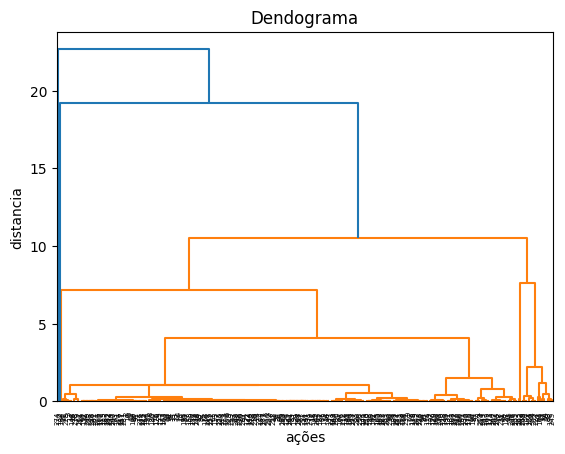

In [40]:
dendograma = dendrogram(linkage(base_cotacoes, method='ward'))
plt.title('Dendograma')
plt.xlabel('ações')
plt.ylabel('distancia')
plt.show()

com sklearn

In [41]:
from sklearn.cluster import AgglomerativeClustering

In [42]:
hc_cotas = AgglomerativeClustering(n_clusters=4, linkage='ward', affinity='euclidean')
rotulos = hc_cotas.fit_predict(base_cotacoes)

In [43]:
rotulos

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [44]:
grafico_cluster = px.scatter(y=base_cotacoes[:,0], x=base_cotacoes[:,1], color=rotulos)
grafico_cluster.show()

pegando as colunas do dataset

In [45]:
valor_cota = df['Preco_Atual']
rendimento_cota = df['Dividendo']

criando os eixos x e y

In [46]:
lista_rend = [] #liquidez_diaria
lista_vc = [] #preço atual
for rd, vc in zip(rendimento_cota,valor_cota):
    try:
        lista_rend.append(rd)
        lista_vc.append(vc)
    except:
        pass

juntando as informações em coordenadas

In [47]:
lista_cotacao = []
for x,y in zip(lista_rend, lista_vc):
    item = [x,y]
    lista_cotacao.append(item)

print(lista_cotacao)

[[0.0, 2.38], [0.0, 14.7], [0.0, 6.29], [0.0, 842.0], [0.0, 9.4], [1.38, 93.0], [0.22, 165.0], [0.25, 84.96], [0.48, 351.0], [0.0, 115.5], [0.0, 4.49], [0.0, 33.85], [1.62, 112.0], [9.16, 784.0], [0.64, 62.01], [0.0, 0.0], [0.0, 0.96], [0.0, 3.71], [0.32, 35.06], [0.17, 42.42], [10.76, 910.0], [5.4, 1000.0], [6.8, 1.04], [0.0, 81.89], [0.75, 94.0], [2.49, 240.99], [0.33, 86.48], [0.09, 12.78], [12.6, 1520.0], [0.1, 7.1], [0.0, 70.25], [0.0, 4.09], [0.75, 79.6], [0.86, 0.0], [0.18, 28.45], [0.6, 0.0], [0.15, 62.5], [0.17, 8.06], [0.75, 98.84], [0.92, 89.8], [1.68, 195.0], [1.15, 87.92], [0.18, 0.0], [1.45, 97.0], [1.04, 93.84], [1.16, 97.12], [0.91, 153.18], [0.27, 13.99], [1.0, 92.51], [0.98, 98.88], [1.4, 99.13], [0.82, 124.49], [1.31, 9.4], [0.93, 85.0], [0.07, 7.73], [0.49, 87.75], [0.62, 71.97], [1.02, 80.94], [0.56, 65.82], [1.52, 101.87], [0.75, 69.2], [0.56, 78.55], [1.2, 103.7], [1.01, 109.5], [0.68, 0.0], [0.4, 43.01], [0.58, 80.0], [1.0, 87.58], [1.19, 85.1], [0.62, 75.44], [

In [48]:
base_cotacoes = np.array(lista_cotacao)
scaler_base = StandardScaler()
base_cotacoes_rend = scaler_base.fit_transform(base_cotacoes)
base_cotacoes_rend

array([[-8.62092570e-02, -1.00325551e-01],
       [-8.62092570e-02, -9.77160979e-02],
       [-8.62092570e-02, -9.94973885e-02],
       [-8.62092570e-02,  7.75112180e-02],
       [-8.62092570e-02, -9.88386711e-02],
       [-5.65642215e-02, -8.11316680e-02],
       [-8.14832369e-02, -6.58816176e-02],
       [-8.08387796e-02, -8.28345903e-02],
       [-7.58979403e-02, -2.64856539e-02],
       [-8.62092570e-02, -7.63660273e-02],
       [-8.62092570e-02, -9.98786398e-02],
       [-8.62092570e-02, -9.36600081e-02],
       [-5.14085632e-02, -7.71073492e-02],
       [ 1.10565036e-01,  6.52264552e-02],
       [-7.24608348e-02, -8.76955439e-02],
       [-8.62092570e-02, -1.00829650e-01],
       [-8.62092570e-02, -1.00626316e-01],
       [-8.62092570e-02, -1.00043849e-01],
       [-7.93350459e-02, -9.34037225e-02],
       [-8.25573324e-02, -9.18448285e-02],
       [ 1.44936092e-01,  9.19140435e-02],
       [ 2.97930557e-02,  1.10976607e-01],
       [ 5.98677294e-02, -1.00609371e-01],
       [-8.

lembrando que já temos o setor

In [49]:
k_means_cotacao = KMeans(n_clusters=4)
k_means_cotacao.fit(base_cotacoes_rend)

KMeans(n_clusters=4)

In [50]:
centroides = k_means_cotacao.cluster_centers_
centroides

array([[-0.06929914, -0.08215835],
       [16.75474872, 15.99644584],
       [ 0.71828826,  4.9823087 ],
       [ 0.18070347,  0.18130926]])

In [51]:
rotulos = k_means_cotacao.labels_
rotulos

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0])

In [52]:
n_cluster = df['Setor']
n_cluster = set(n_cluster)
nome_cluster = n_cluster
for id, x in enumerate(nome_cluster):
    id_n = id+1
    print(id_n,x)

1 Hotel
2 Logística
3 Lajes Corporativas
4 Hospital
5 Outros
6 Shoppings
7 Residencial
8 Títulos e Val. Mob.
9 Híbrido


grafico por dividendos x valor da cota

In [53]:
nome_rotulo = df['Codigo_do_fundo']
grafico_c_rt = px.scatter(y=lista_rend, x=lista_vc, color=lista_rt, labels=nome_rotulo)
grafico_c_rt.show()

In [54]:
grafico_cluster = px.scatter(y=base_cotacoes_rend[:,0], x=base_cotacoes_rend[:,1], color=rotulos)
grafico_centroid = px.scatter(y=centroides[:,0], x=centroides[:,1], size=[5,2,3,4])
grafico_geral = go.Figure(data=grafico_cluster.data + grafico_centroid.data)
grafico_geral.show()

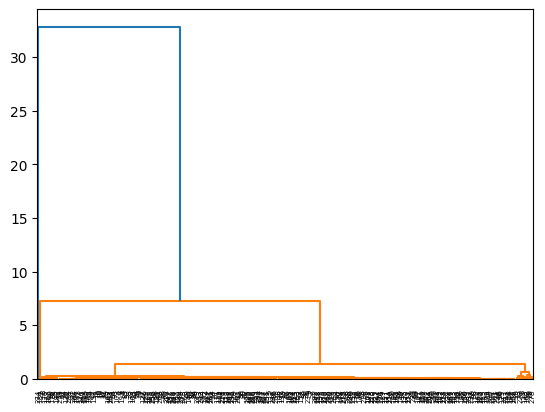

In [55]:
dendograma_rendimento = dendrogram(linkage(base_cotacoes_rend, method='ward'))

se imaginarmo uma linha entre 10 e 15 temos ali 3 linhas verticais

In [56]:
hc_rendimento = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
rotulo_hc = hc_rendimento.fit_predict(base_cotacoes_rend)

In [57]:
rotulo_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [58]:
grafico_cluster_rend = px.scatter(y=base_cotacoes_rend[:,0], x=base_cotacoes_rend[:,1], color=rotulo_hc)
grafico_cluster_rend.show()

vizualizando o csv que atende os requisitos

In [59]:
dataframe = df
dataframe

,Unnamed: 0,Codigo_do_fundo,Setor,Preco_Atual,Liquidez_Diária,Dividendo,DividendYield,DY_(3M)Acumulado,DY_(6M)Acumulado,DY_(12M)Acumulado,...,PatrimônioLíq,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab.Patr.noPeríodo,Rentab.Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,0,FIVN11,Shoppings,2.38,2454,0.00,0.00%,0.00%,0.00%,0.00%,...,65531708.68,6.96,34.0,0.00%,0.00%,0.00%,0.00%,56.00%,0.00%,1
1,1,BZLI11,Títulos e Val. Mob.,14.70,44041,0.00,0.00%,0.00%,0.00%,0.00%,...,439856409.07,10.80,136.0,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0
2,2,XTED11,Lajes Corporativas,6.29,2702,0.00,0.00%,0.00%,0.00%,0.00%,...,27172278.20,13.83,45.0,0.00%,0.00%,0.00%,0.00%,0.00%,100.00%,1
3,3,ALMI11,Lajes Corporativas,842.00,29,0.00,0.00%,0.00%,0.00%,0.00%,...,249878508.15,2247.57,37.0,0.00%,0.00%,0.00%,0.00%,64.05%,0.00%,1
4,4,PABY11,Híbrido,9.40,67,0.00,0.00%,0.00%,0.00%,0.00%,...,-10622559.80,-14.01,-67.0,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,278,FLRP11,Shoppings,1579.99,15,10.00,0.63%,2.33%,4.70%,8.08%,...,112693577.60,1727.58,91.0,0.58%,0.48%,1.06%,3.30%,2.01%,0.00%,1
279,279,CNES11,Lajes Corporativas,35.43,87,0.10,0.26%,0.83%,1.49%,3.62%,...,257461125.79,87.30,41.0,0.11%,0.84%,0.95%,1.16%,56.70%,0.00%,1
280,280,BTRA11,Outros,87.00,8717,0.70,0.74%,2.46%,5.21%,10.20%,...,348490615.97,103.58,84.0,0.68%,0.25%,0.93%,3.63%,0.00%,0.00%,0
281,281,EDGA11,Lajes Corporativas,20.38,2911,0.09,0.47%,2.12%,4.51%,7.21%,...,252351519.37,66.20,31.0,0.26%,-0.06%,0.20%,0.36%,48.81%,0.00%,1


In [60]:
n_cluster = df['Setor']
n_cluster = set(n_cluster)
nome_cluster = n_cluster
for id, x in enumerate(nome_cluster):
    print(x)

Hotel
Logística
Lajes Corporativas
Hospital
Outros
Shoppings
Residencial
Títulos e Val. Mob.
Híbrido


In [72]:
restricao_setor = 'Shoppings'
restricao_lq_diaria = 25000
# filtro_df = dataframe[(dataframe.Dividendo >= 0.1) & (dataframe.QuantidadeAtivos != 0)]
filtro_df = dataframe[(dataframe.Codigo_do_fundo == 'ARRI11')]
filtro_df

,Unnamed: 0,Codigo_do_fundo,Setor,Preco_Atual,Liquidez_Diária,Dividendo,DividendYield,DY_(3M)Acumulado,DY_(6M)Acumulado,DY_(12M)Acumulado,...,PatrimônioLíq,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab.Patr.noPeríodo,Rentab.Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
52,52,ARRI11,Títulos e Val. Mob.,9.4,61169,1.31,1.43%,4.11%,8.05%,16.20%,...,108.835.561.27,92.37,10.0,1.42%,-1.26%,0.14%,7.14%,0.00%,0.00%,0
